# Twitter sentiment analysis

In [76]:
#import basic libraries
import numpy as np
import pandas as pd
import nltk,json
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as WordCloud

In [77]:
#read the file
data=pd.read_csv('twitter_data.csv')


In [78]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [79]:
data.shape

(31962, 3)

In [80]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [82]:

tweet =data.columns.values[2]
sentiment = data.columns.values[1]
tweet, sentiment

('tweet', 'label')

# Text preprocessing

In [83]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
   
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [84]:
data['processed_tweet'] = np.vectorize(process_tweet)(data[tweet])
data.head()

,id,label,tweet,processed_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfis...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can use cause they don...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with all the time in urð ð ð ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


# Top words

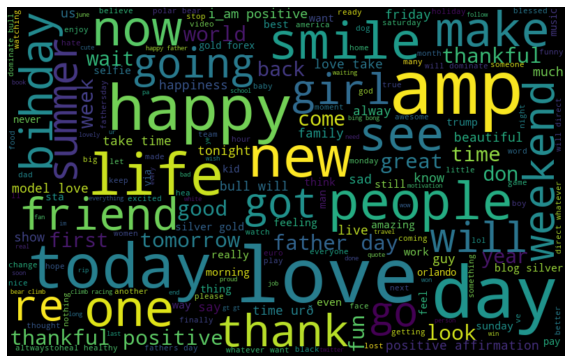

In [85]:
all_words = ' '.join([text for text in data['processed_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Positive words

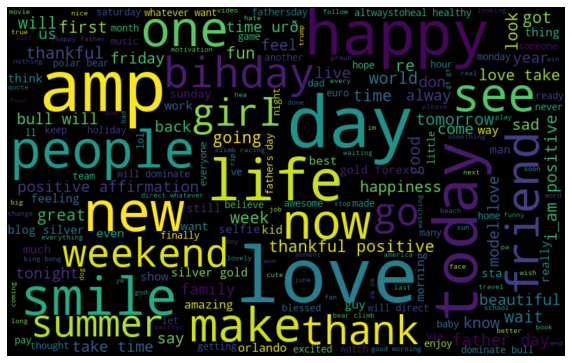

In [86]:
normal_words= ' '.join([text for text in data['processed_tweet'][data['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Negative words

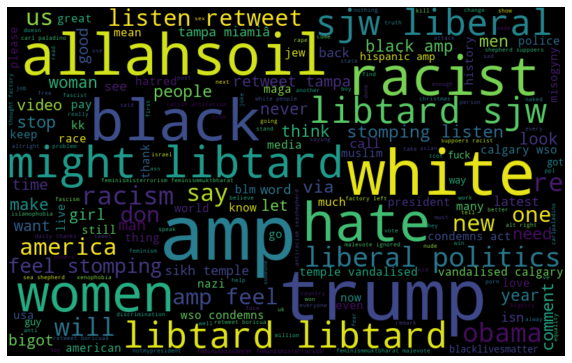

In [87]:
negative_words= ' '.join([text for text in data['processed_tweet'][data['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Tokenization

In [88]:
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, is, dysfunctional, and, is, so,...
1    [thanks, for, lyft, credit, can, use, cause, t...
2                              [bihday, your, majesty]
3    [model, love, take, with, all, the, time, in, ...
4               [factsguide, society, now, motivation]
Name: processed_tweet, dtype: object

#Lemmatization

In [90]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [91]:
 from nltk.stem.wordnet import WordNetLemmatizer
 lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [when, father, is, dysfunctional, and, is, so,...
1    [thanks, for, lyft, credit, can, use, cause, t...
2                              [bihday, your, majesty]
3    [model, love, take, with, all, the, time, in, ...
4               [factsguide, society, now, motivation]
Name: processed_tweet, dtype: object

# count vectorizer

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(data['processed_tweet'])  
final_vectorized_data

<31962x220376 sparse matrix of type '<class 'numpy.int64'>'
	with 692074 stored elements in Compressed Sparse Row format>

# split data for train and test

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data,data['label'],
                                                    test_size=0.2, random_state=69)  

#import Naive bayes classifier

In [114]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model.predict(X_test)

# evaluate the model

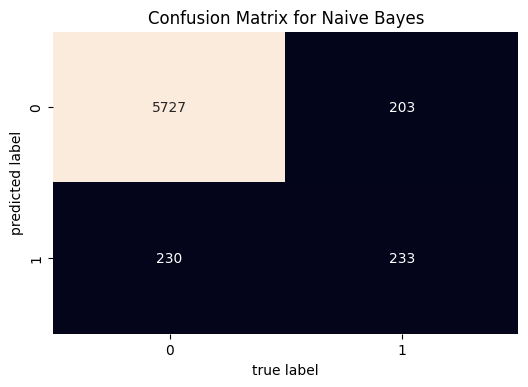

In [108]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [109]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9322696699515095


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5957
           1       0.50      0.53      0.52       436

    accuracy                           0.93      6393
   macro avg       0.73      0.75      0.74      6393
weighted avg       0.93      0.93      0.93      6393



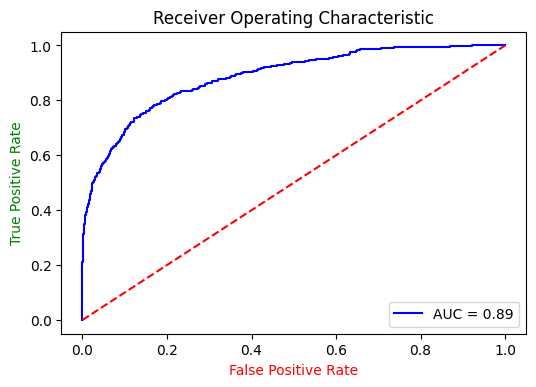

In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=100)                       # to plot high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.show()